<a href="https://colab.research.google.com/github/aolivera0/computacion-visual/blob/main/2025-09-10_taller_0_transformaciones/python/Taller_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIF generado: animacion.gif


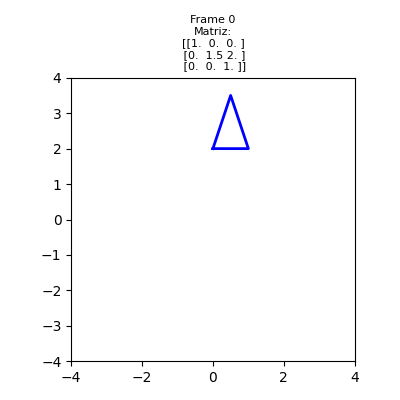

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# --------------------------
# Funciones de transformaciones
# --------------------------
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0, 0, 1]])

def scaling_matrix(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0,  0, 1]])

# --------------------------
# Figura base: un triángulo
# --------------------------
triangle = np.array([[0, 1, 0.5, 0],   # X coords
                     [0, 0, 1, 0],     # Y coords
                     [1, 1, 1, 1]])    # Homogéneo

frames = []
n_frames = 60

for t in range(n_frames):
    theta = 2 * np.pi * t / n_frames        # ángulo (rotación)
    sx = 1 + 0.5*np.sin(2*np.pi*t/n_frames) # escala x variable
    sy = 1 + 0.5*np.cos(2*np.pi*t/n_frames) # escala y variable
    tx = np.sin(theta) * 2                  # traslación x
    ty = np.cos(theta) * 2                  # traslación y

    # Matriz total de transformación
    T = translation_matrix(tx, ty) @ rotation_matrix(theta) @ scaling_matrix(sx, sy)
    transformed = T @ triangle

    # Graficar
    fig, ax = plt.subplots(figsize=(4,4))
    ax.plot(transformed[0, :], transformed[1, :], 'b-', linewidth=2)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.set_title(f"Frame {t}\nMatriz:\n{np.round(T,2)}", fontsize=8)

    # Guardar frame en memoria
    plt.tight_layout()
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    image = image[:, :, :3] # Convert RGBA to RGB
    frames.append(image)
    plt.close(fig)

# --------------------------
# Exportar a GIF
# --------------------------
imageio.mimsave('animacion.gif', frames, fps=10)
print("GIF generado: animacion.gif")


from IPython.display import Image
Image(filename="animacion.gif")